# Lab 2: Linear Regression using polynomials

## Goals
In this lab, you will:
- learn how to use polynomials to fit more complex models using linear regression.

<a name="toc_40291_2"></a>
# Problem Statement
As we saw in the previous lab, [linear regression](https://www.ibm.com/topics/linear-regression) analysis is used to predict the value of a variable (*y*) based on the value of another variable (*x*). The variable you want to predict is called the dependent variable (*y*). The variable you are using to predict the other variable's value is called the independent variable (*x*).

This form of analysis estimates the coefficients of a linear equation, involving one or more independent variables that best predict the value of the dependent variable. Linear regression fits a straight line or surface that minimizes the discrepancies between predicted and actual output values.



---



In this lab we are going to see how this algorithm works with a simple example, using the Python library "numpy", especifically the ["polyfit"](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) and the ["poly1d"](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html) functions.

First, we are going to import some libraries and functions that we will use:


*   **Numpy**, that allows us to work with arrays and create the models
*   The **"pyplot"** package from Matplotlib, that will allow us to plot some results

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Then we define some functions that will be useful to plot the results of the models we will create

In [2]:
# Plot a figure with the data and the regression function
def plot_data(xTrain, yTrain, model, name, xVal = None, yVal = None, validation = False):
  polyline = np.linspace(1.9, 13, 100)

  fig, ax = plt.subplots(figsize=(10, 7))
  plt.scatter(xTrain, yTrain, s=100, c = 'b')
  if validation:
    plt.scatter(xVal, yVal, s=100, c = 'orange')
  plt.rcParams.update({'font.size': 14})

  ax.set_xlabel('years(x)')
  ax.set_ylabel('price(y)')
  ax.set_title('price for used cars '+ name)

  ax.axis([1.5, 13, 0, 12000])
  ax.grid(True);
  plt.plot(polyline, model(polyline))


## DATA

In this case, we are presented with a simple problem: the price of used cars along the years. Cars are then presumed to be in a linear relationship with how old it is. We have two datasets:


*   Training data, where **xTrain** contains a single feature (car age) for the training dataset, and **yTrain** contains the ground truth labels of these samples, in this case the price of the car. This dataset will be used to fit the models we will train.
*   Validation data, where **xVal** contains the features of the validation dataset, so, the age of each car, and **yVal** contains the ground truth of these samples, in this case the price of the car. This dataset will be used to verify how accurate the fitted models are, using data that has not been used to train the model.

In [4]:
# Training data
xTrain = np.array([2, 2.5, 2.75, 3, 3.5, 4, 4.5, 5, 5.5, 6, 7, 8, 9, 9.5, 10, 11, 12, 12.5])
# Labels of the training data
yTrain = np.array([11200, 9950, 10750, 9400, 7500, 6300, 5800, 5700, 4200, 4400, 4200, 3800, 3950, 2700, 2100, 2500, 1850, 1800])

# Validation data
xVal = np.array([2.5, 2.75, 3.5, 4, 5, 5.75, 6.5, 7, 8, 8.5, 9, 10.5, 12, 9.5])
# Labels of the validation data
yVal = np.array([10250, 8750, 8500, 5800, 6200, 5000, 4500, 3500, 3250, 3000, 2250, 2500, 2250, 3800])

First, we are going to plot the training data and analize it.

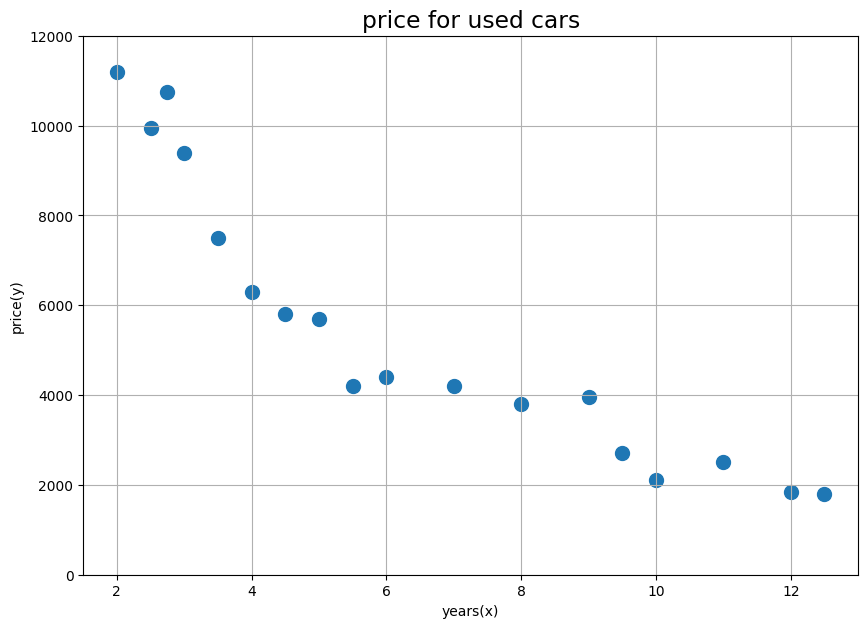

In [5]:
# Plot the training data
fig, ax = plt.subplots(figsize=(10, 7))
plt.scatter(xTrain, yTrain, s=100)

plt.rcParams.update({'font.size': 14})

ax.set_xlabel('years(x)')
ax.set_ylabel('price(y)')
ax.set_title('price for used cars')

ax.axis([1.5, 13, 0, 12000])
ax.grid(True)

<a name="toc_40291_2.2"></a>
##  Modeling Linear Regressions
To start, we have an example of how to create a basic regressions function with dregree = 1 using the ["polyfit"](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) and the ["poly1d"](https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html) functions. Next, the mean error percentage is computed for the train data and the fitted function and the training data is plotted.

Mean error train:
24.58


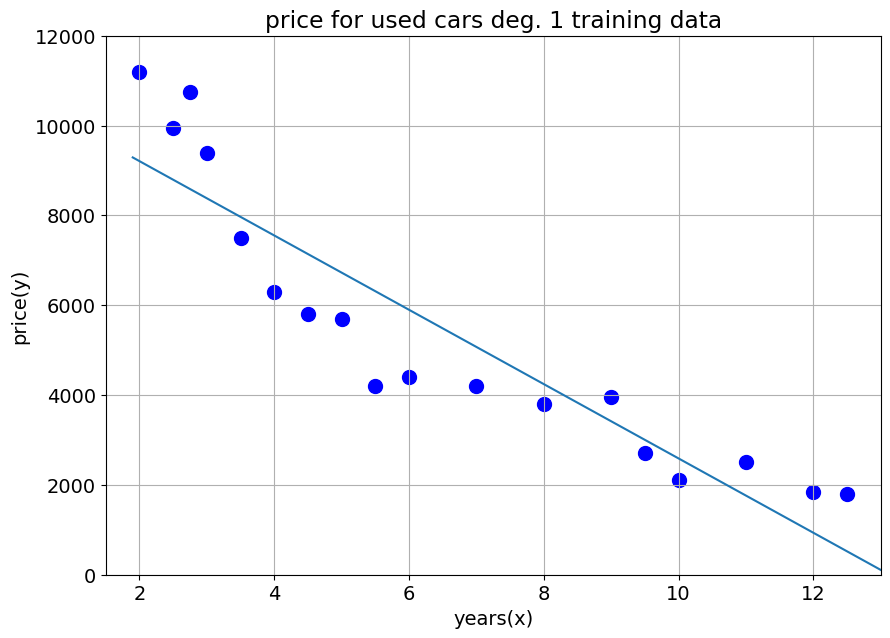

In [6]:
#polynomial fit with degree = 1
modeld1 = np.poly1d(np.polyfit(xTrain, yTrain, 1))
#mean error percentatge is computed for the train data
print("Mean error train:")
per1 = np.sum(np.abs(modeld1(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(round(per1,2))
# plot model and training data
plot_data(xTrain, yTrain, modeld1, "deg. 1 training data")

Sometimes a higher degree function give better results to our problems.

Define a new model with a polynomial function of degrees 2 and 4, and compare the results with the linear ones. **Which one is better?**

Mean error train deg. 2:
14.207545998417812
Mean error train deg. 4:
8.809393580201247


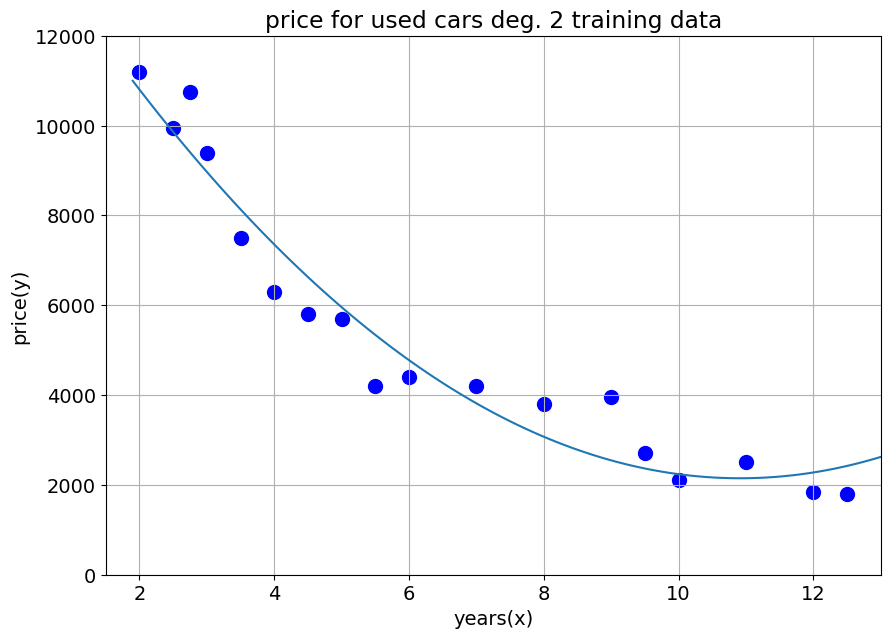

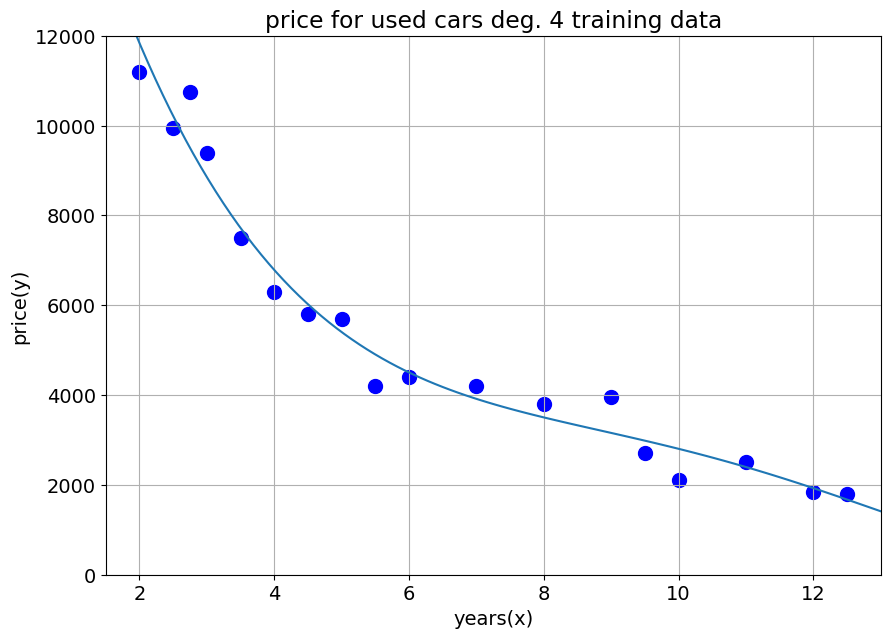

In [7]:
# TO DO: Define a new model with a polynomial function of degrees 2 and 4, and compare the results with the linear ones.

#polynomial fit with degree = 2
modeld2 = np.poly1d(np.polyfit(xTrain, yTrain, 2))
#mean error percentatge is computed for the train data
print("Mean error train deg. 2:")
per1 = np.sum(np.abs(modeld2(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(per1)
# plot model and training data
plot_data(xTrain, yTrain, modeld2, "deg. 2 training data")

#polynomial fit with degree = 4
modeld4 = np.poly1d(np.polyfit(xTrain, yTrain, 4))
#mean error percentatge is computed for the train data
print("Mean error train deg. 4:")
per2 = np.sum(np.abs(modeld4(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(per2)
# plot model and training data
plot_data(xTrain, yTrain, modeld4, "deg. 4 training data")




<font color='red'>With a mean error of 24.58%, the linear model is the simplest but also the worst. While both the degree 2 and degree 4 models show lower error, the degree 4 model performs the best on the training data.</font>


As we saw before, we have another dataset called "validation data" that allows us to further check which model is better for us. Compute the mean error percentage for the model with the validation data and compare them with the training data . **Now, which model do you think is better for our data? Is it the same as the one chosen before? Explain why.**

Mean error train model deg 1:
24.58
Mean error test model deg 1:
25.17
Mean error train model deg 2:
14.207545998417812
Mean error test model deg 2:
9.982021272220376
Mean error train model deg 4:
8.809393580201247
Mean error test model deg 4:
12.30018037115111


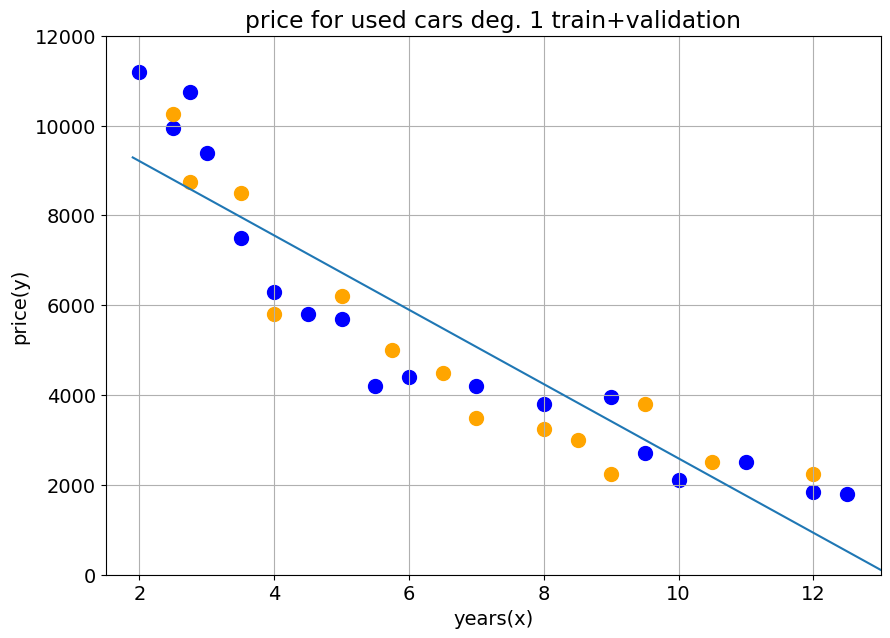

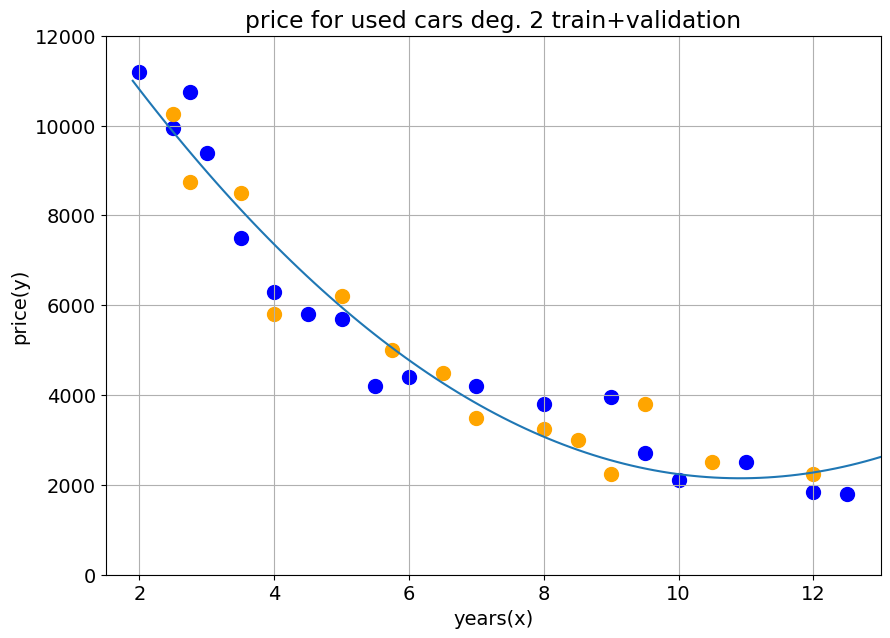

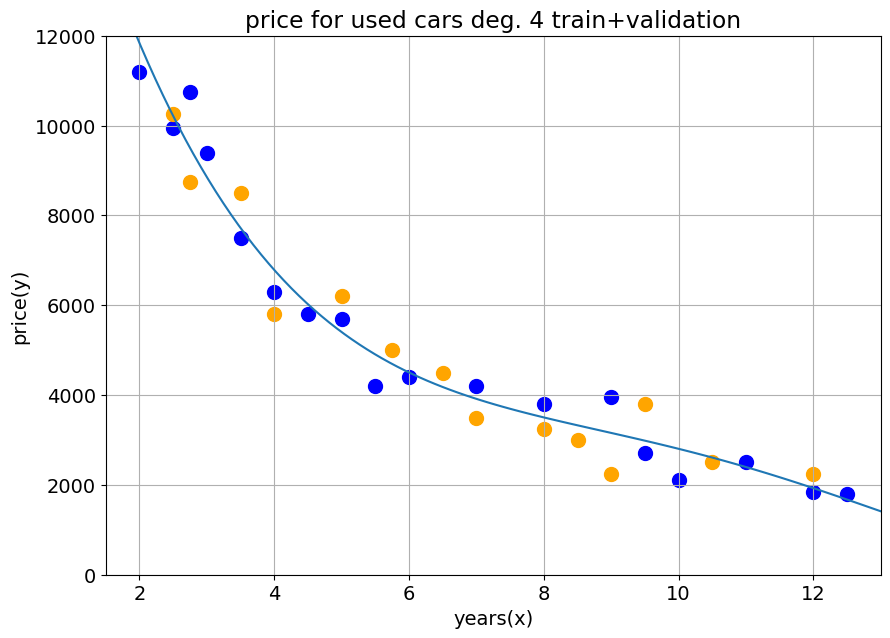

In [8]:
#mean error percentatge for model deg. 1 is computed for the train and validation data
print("Mean error train model deg 1:")
per1_T = np.sum(np.abs(modeld1(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(round(per1_T,2))
print("Mean error test model deg 1:")
per1_V = np.sum(np.abs(modeld1(xVal)-yVal)/yVal)/len(yVal)*100
print(round(per1_V,2))

# plot model and training data
plot_data(xTrain, yTrain, modeld1, "deg. 1 train+validation", xVal, yVal, True)

#mean error percentatge for model deg. 1 is computed for the train and validation data
print("Mean error train model deg 2:")
per2_T = np.sum(np.abs(modeld2(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(per2_T)
print("Mean error test model deg 2:")
per2_V = np.sum(np.abs(modeld2(xVal)-yVal)/yVal)/len(yVal)*100
print(per2_V)

# plot model and training data
plot_data(xTrain, yTrain, modeld2, "deg. 2 train+validation", xVal, yVal, True)

#mean error percentatge for model deg. 1 is computed for the train and validation data
print("Mean error train model deg 4:")
per4_T = np.sum(np.abs(modeld4(xTrain)-yTrain)/yTrain)/len(yTrain)*100
print(per4_T)
print("Mean error test model deg 4:")
per4_V = np.sum(np.abs(modeld4(xVal)-yVal)/yVal)/len(yVal)*100
print(per4_V)

# plot model and training data
plot_data(xTrain, yTrain, modeld4, "deg. 4 train+validation", xVal, yVal, True)

<font color='red'>No, it is not the same model. The degree 1 model is underfitting, failing to capture too simple to capture the underlying patterns in the data. The degree 2 model shows a good balance, as its validation error is lower than its training error, indicating strong generalization without overfitting. In contrast, the degree 4 model overfits the data—it performs well on the training set but does not generalize to the validation data, with a higher validation error than the degree 2 model.

Overall, the degree 2 model is the best choice, offering a solid balance between fitting the training data and generalizing to unseen data.</font>

In reality, when running Gradient Descent, your loss is computed as the Mean Squared Error.
1. Import the function "mean_squared_error" from the library "sklearn.metrics"
2. Create a FOR loop that trains models from degree 1 to degree 14
3. Plot the model at every iteration, and compute de MSE for train and for validation. Store them in two vectors "TrainMSE" and "ValMSE".


266.2590194478913
350.7324718125762
259.13995057814503
351.92999004613904


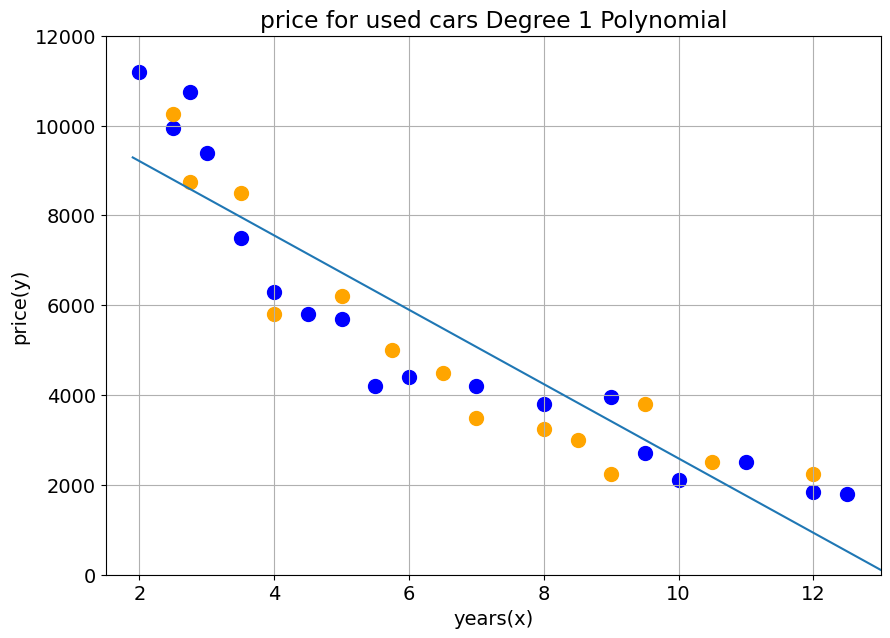

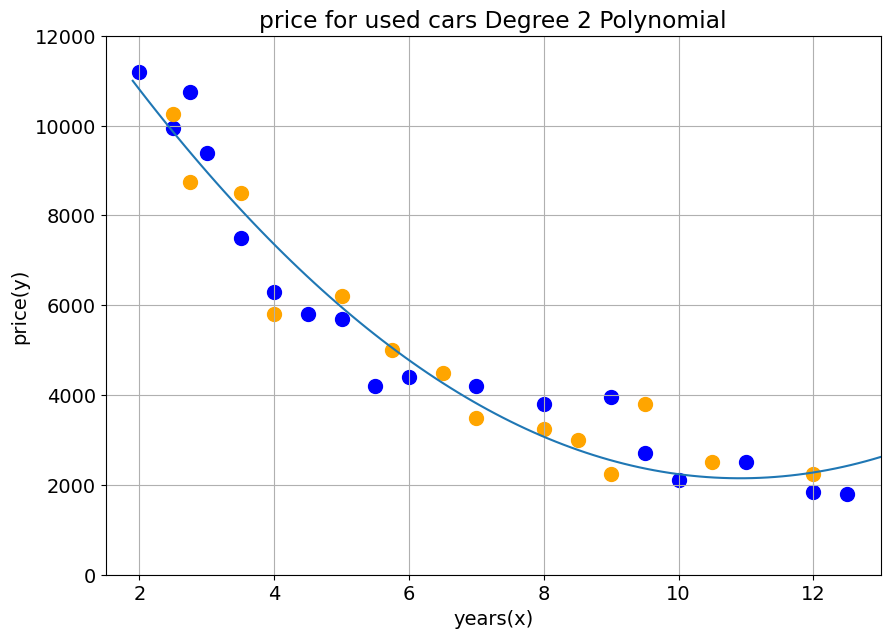

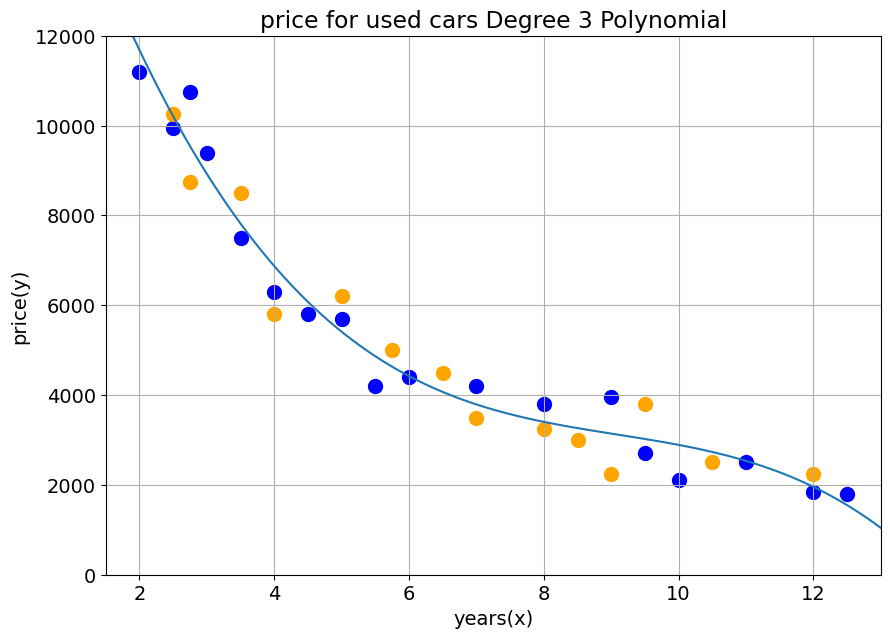

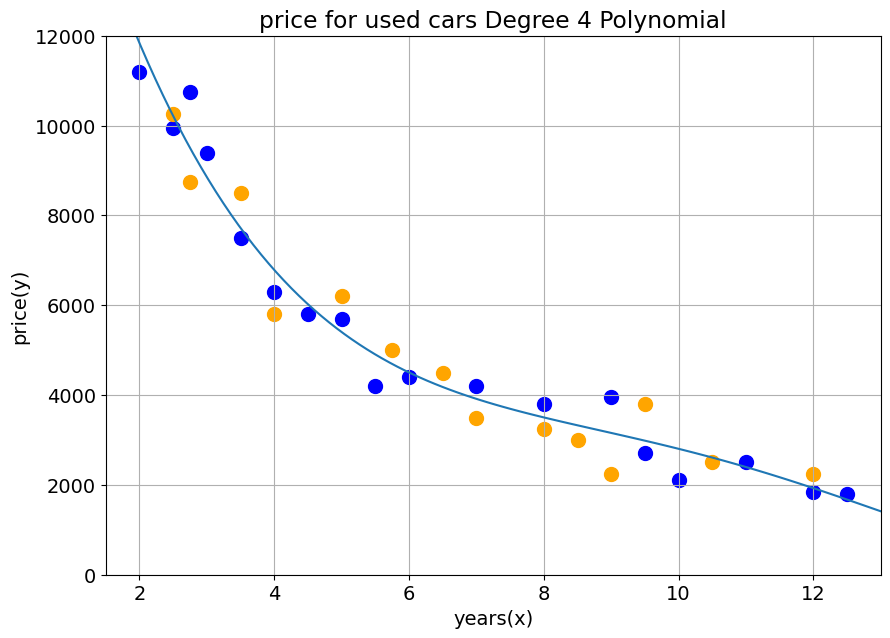

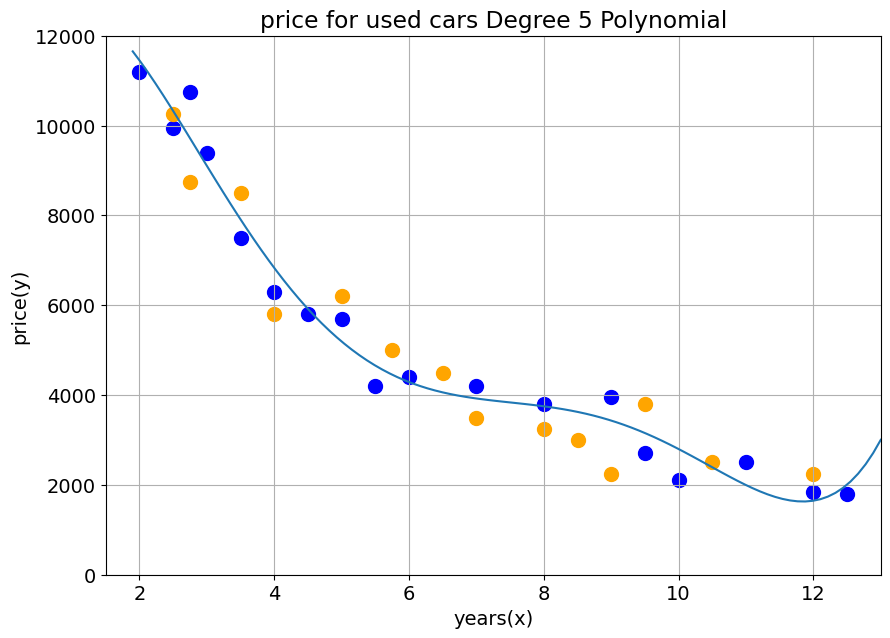

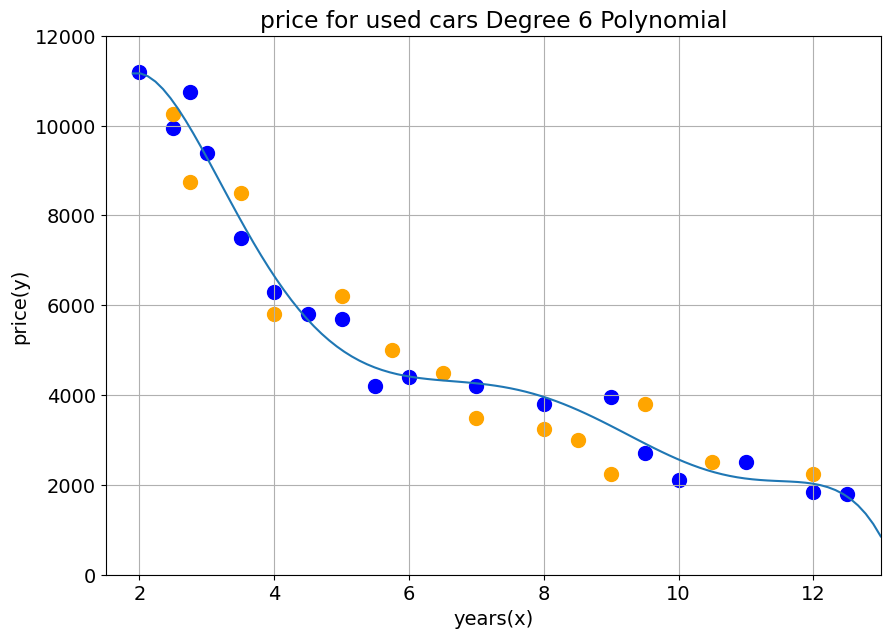

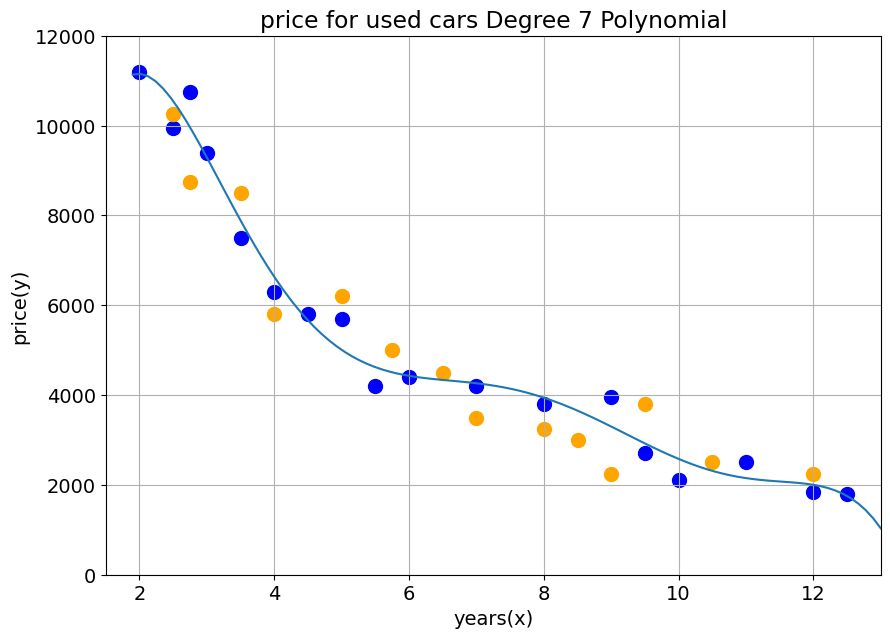

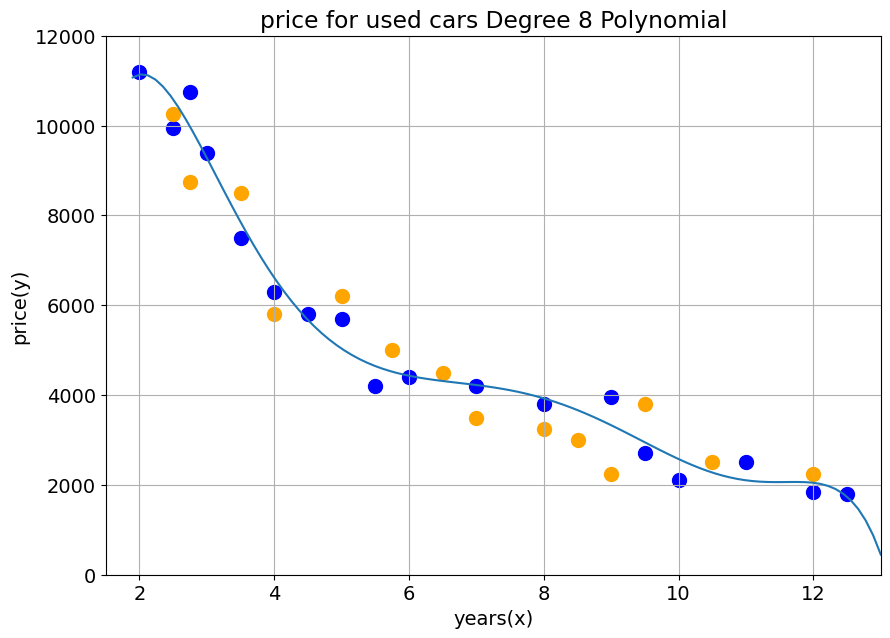

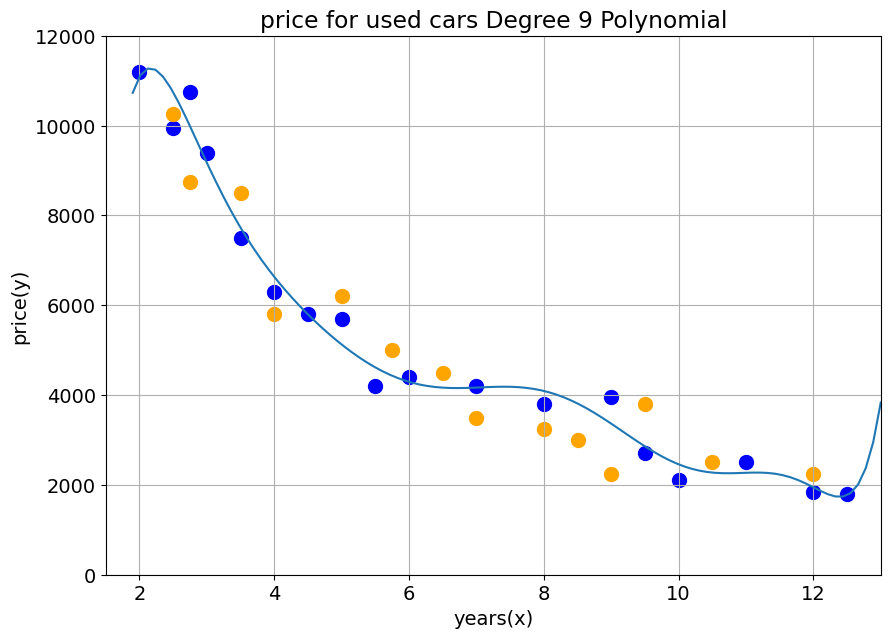

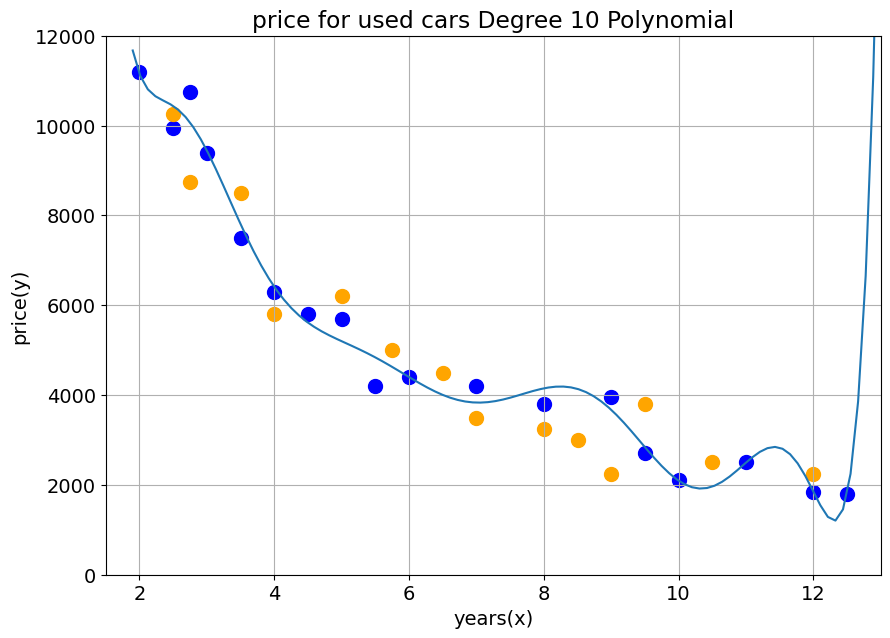

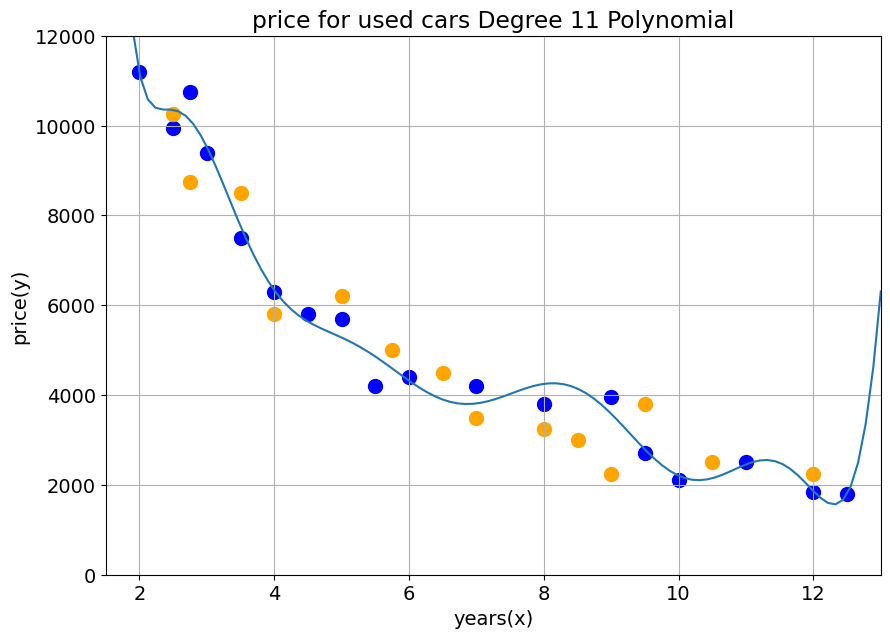

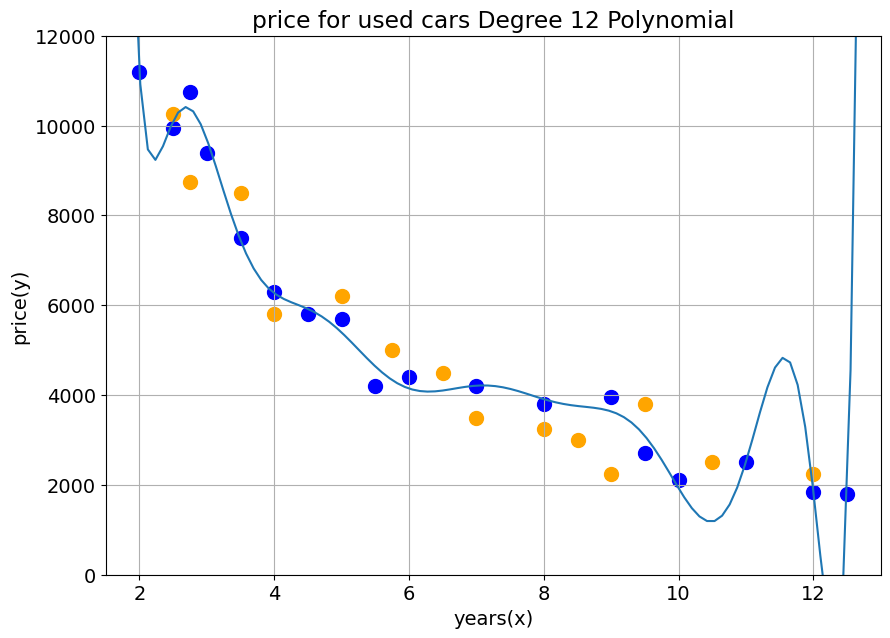

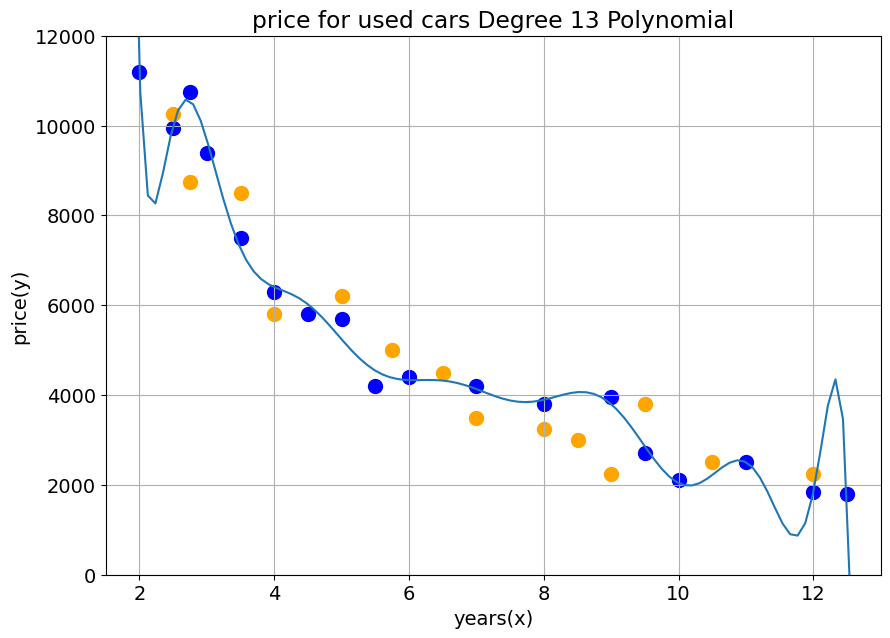

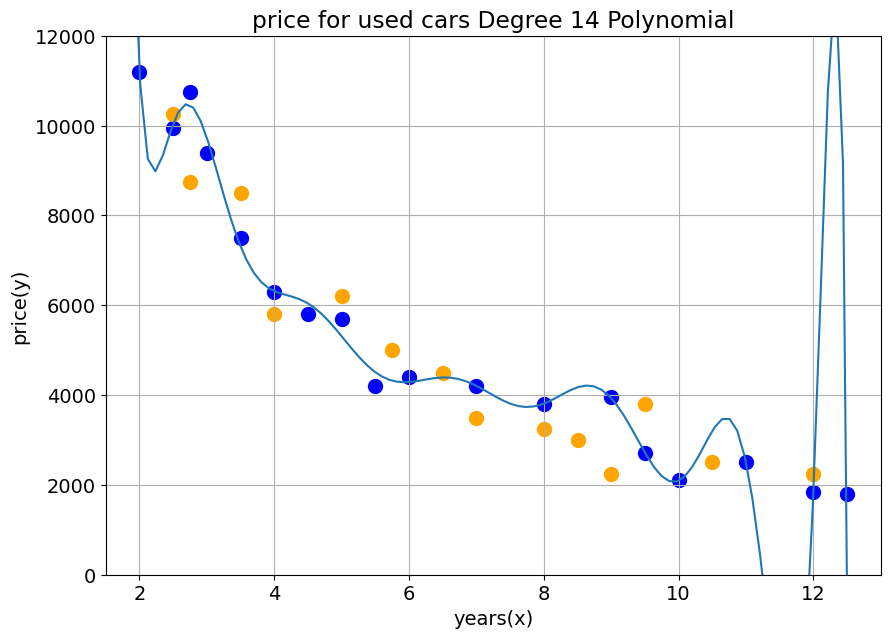

In [9]:
from sklearn.metrics import mean_squared_error

# Vectors to store Mean Squared Error (MSE) for training and validation sets
TrainMSE = []
ValMSE = []

# For loop
for i in range (1, 15):

  # Fit a polynomial model of degree i to the training data
  model = np.poly1d(np.polyfit(xTrain, yTrain, i))
  # Predict using the model on both training and validation sets
  y_pred_train = model(xTrain)
  y_pred_Val = model(xVal)
  # Compute the Mean squared Error for training and validation
  TrainMSE.append(mean_squared_error(yTrain, y_pred_train) / 1000)
  ValMSE.append(mean_squared_error(yVal, y_pred_Val) / 1000)

  plot_data(xTrain, yTrain, model, f"Degree {i} Polynomial", xVal, yVal, validation=True)

# Print the MSE for the degree 3 model for both training and validation sets
print(TrainMSE[2])
print(ValMSE[2])
# Print the MSE for the degree 4 model for both training and validation sets
print(TrainMSE[3])
print(ValMSE[3])






Plot "TrainMSE" and "ValMSE" for every degree of polynomial. **What would be the best model? Explain why**

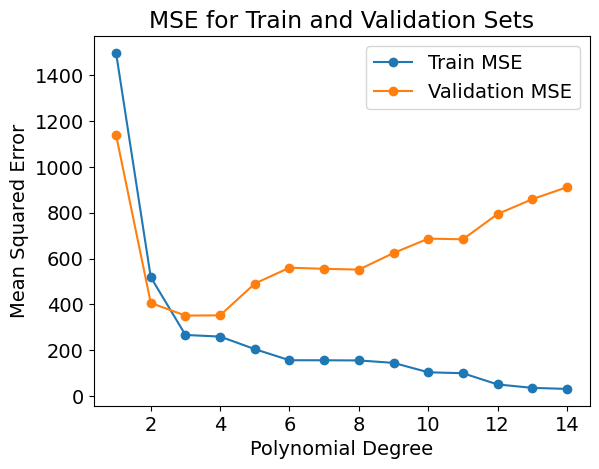

In [10]:

# Plot TrainMSE and ValMSE to compare the fitted models computed above


plt.figure()
plt.plot(range(1, 15), TrainMSE, label='Train MSE', marker='o')
plt.plot(range(1, 15), ValMSE, label='Validation MSE', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('MSE for Train and Validation Sets')
plt.show()



<font color='red'>As the polynomial degree increases, the training MSE decreases since higher-degree polynomials can fit the data more closely. Initially, the validation MSE also decreases as the model captures underlying patterns, but after degree 4, it starts to rise, indicating overfitting—the model begins to capture noise rather than meaningful patterns.

At first glance at the plot, both the degree 3 and 4 models show low training and validation MSE, but after doing the calculations, degree 3 is the better choice. It achieves the lowest MSE (350.73) on the validation set, after which the model starts to diverge and overfit by memorizing the data.</font>

Submit this notebook by the lab deadline, with the cells executed and including your **answers** in the text fields in $\color{red}{\text{red}}$ color.